### Инструкция по выполнению проекта:

Вы - маркетинговый аналитик развлекательного приложения Procrastinate Pro+. Несколько прошлых месяцев ваш бизнес постоянно нес убытки - в привлечение пользователей была вложена куча денег, а толку никакого. Вам нужно разобраться в причинах этой ситуации.

У вас в распоряжении есть лог сервера с данными о посещениях приложения новыми пользователями, зарегистрировавшимися в период с 2019-05-01 по 2019-10-27, выгрузка их покупок за этот период, а также статистика рекламных расходов. Вам предстоит изучить, как люди пользуются продуктом, когда они начинают покупать, сколько денег приносит каждый клиент, когда он окупается и какие факторы отрицательно влияют на привлечение пользователей.

#### Шаг 1. Загрузите данные и подготовьте их к анализу
Загрузите данные о визитах, заказах и расходах в переменные. Оптимизируйте данные для анализа. Убедитесь, что тип данных в каждой колонке — правильный. Путь к файлам:

 -   /datasets/visits_info_short.csv. Скачать датасет
 -   /datasets/orders_info_short.csv. Скачать датасет
 -   /datasets/costs_info_short.csv. Скачать датасет
 
#### Шаг 2. Задайте функции для расчета и анализа LTV, ROI, удержания и конверсии

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

#### Шаг 3. Проведите исследовательский анализ данных

Постройте профили пользователей. Определите минимальную и максимальную дату привлечения пользователей.

Выясните:
- Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?
- Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?
- По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?.

#### Шаг 4. Маркетинг
Выясните:

- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько в среднем стоило привлечение одного покупателя из каждого источника?

#### Шаг 5. Оцените окупаемость рекламы для привлечения пользователей

С помощью LTV и ROI:
- Проанализируйте общую окупаемость рекламы;
- Проанализируйте окупаемость рекламы с разбивкой по устройствам;
- Проанализируйте окупаемость рекламы с разбивкой по странам;
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам.

Опишите проблемы, которые вы обнаружили. Ответьте на вопросы:
- Окупается ли реклама, направленная на привлечение пользователей в целом? 
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
- Чем могут быть вызваны проблемы окупаемости? Изучите конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам.

Опишите возможные причины обнаруженных проблем и сформируйте рекомендации для рекламного отдела. При решении этого шага считайте, что вы смотрите данные 1-го ноября 2019 года и что в вашей организации принято считать, что окупаемость должна наступать не позднее, чем через 2 недели после привлечения пользователей.

Подумайте, нужно ли включать в анализ органических пользователей?

#### Шаг 6. Напишите выводы
- Выделите причины неэффективности привлечения пользователей;
- Сформируйте рекомендации для отдела маркетинга для повышения эффективности.

#### Оформление: 
Задание выполните в Jupyter Notebook. Программный код заполните в ячейках типа code, текстовые пояснения — в ячейках типа markdown. Примените форматирование и заголовки.


#### Описание данных
Таблица visits_log_short (лог сервера с информацией о посещениях сайта):

    User Id — уникальный идентификатор пользователя
    Device — категория устройства пользователя
    Session start — дата и время начала сессии
    Session End — дата и время окончания сессии
    Channel — идентификатор рекламного источника, из которого пришел пользователь
    Region - страна пользователя

Таблица orders_log_short (информация о заказах):

    User Id — уникальный id пользователя, который сделал заказ
    Event Dt — дата и время покупки
    Revenue — выручка

Таблица costs_short (информация о затратах на маркетинг):

    Channel — идентификатор рекламного источника
    Dt — дата
    Costs — затраты на этот рекламный источник в этот день

# Шаг 1. Загрузите данные и подготовьте их к анализу
Загрузите данные о визитах, заказах и расходах в переменные. Оптимизируйте данные для анализа. Убедитесь, что тип данных в каждой колонке — правильный. Путь к файлам:

 -   /datasets/visits_info_short.csv. 
 -   /datasets/orders_info_short.csv. 
 -   /datasets/costs_info_short.csv.

In [2]:
import pandas as pd # импортирую нужные библиотеки
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import datetime, timedelta # импортируем функции для работы со временем
import numpy as np

Прочитаем данные с информацией о визитах

In [3]:
visits = pd.read_csv('/datasets/visits_info_short.csv') # читаю csv файл и вывожу на экран
display(visits.head())

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


Названия столбцов в таблице с визитами не соответсвуют правильному стилю и не удобны для анализа, приведём их в порядок

Приведём названия в порядок:
* приведём названия к нижнему регистру
* названяи из нескольких слов напишем в змеином регистре

Для этого переименуйте колонки так:
* `'User Id':'user_id'`;
* `'Region':'region'`;
* `'Device':'device'`;
* `'Channel':'channel'`;
* `'Session Start':'session_start'`;    
* `'Session End':'session_end'`.

In [4]:
visits = visits.rename(columns = {'User Id':'user_id', 'Region':'region', 'Device':'device', 'Channel':'channel', 'Session Start':'session_start', 'Session End':'session_end'}) # переименование столбцов

In [5]:
visits.columns # проверка результатов - новый перечень названий столбцов

Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object')

Прочитаем файл с информацией о заказах

In [6]:
orders = pd.read_csv('/datasets/orders_info_short.csv') # читаю csv файл и вывожу на экран
display(orders.head())

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


Названия столбцов в таблице с заказми не соответсвуют правильному стилю и не удобны для анализа, приведём их в порядок

Приведём названия в порядок:
* приведём названия к нижнему регистру
* названяи из нескольких слов напишем в змеином регистре

Для этого переименуйте колонки так:
* `'User Id':'user_id'`;
* `'Event Dt':'event_dt'`;
* `'Revenue':'revenue'`.

In [7]:
orders = orders.rename(columns = {'User Id':'user_id', 'Event Dt':'event_dt', 'Revenue':'revenue'}) # переименование столбцов

In [8]:
orders.columns # проверка результатов - перечень названий столбцов

Index(['user_id', 'event_dt', 'revenue'], dtype='object')

Прочитаем данные с информацией о расходах

In [9]:
costs = pd.read_csv('/datasets/costs_info_short.csv') # читаю csv файл и вывожу на экран
display(costs.head())

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


Названия столбцов в таблице с расходами не соответсвуют правильному стилю и не удобны для анализа, приведём их в порядок

Приведём названия в порядок:
* приведём названия к нижнему регистру

Для этого переименуйте колонки так:
* `'dt':'dt'`;
* `'Channel':'channel'`;
* `'costs':'costs'`.

In [10]:
costs = costs.rename(columns = {'dt':'dt', 'Channel':'channel', 'costs':'costs'}) # переименование столбцов

In [11]:
costs.columns # проверка результатов - перечень названий столбцов

Index(['dt', 'channel', 'costs'], dtype='object')

Изучим общую информацию о файлах

In [12]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        309901 non-null  int64 
 1   region         309901 non-null  object
 2   device         309901 non-null  object
 3   channel        309901 non-null  object
 4   session_start  309901 non-null  object
 5   session_end    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [13]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   40212 non-null  int64  
 1   event_dt  40212 non-null  object 
 2   revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [14]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


Исходя из общей информации о файлах в них нет пропусков. В файле visits в столбацах 'session_start' и 'session_end', в файле orders в столбце 'event_dt' и в файле costs в столбце 'dt' содержится дата, но тип данных  в этих столбцах object, что ослажняет работу с этими данными, поэтому заменим тип данных в этих столбцах на datetime64.

In [15]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [16]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


In [17]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [18]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


Проверим отсутствие дубликатов в таблицах

In [19]:
visits.duplicated().sum() # подсчёт явных дубликатов

0

In [20]:
costs.duplicated().sum() # подсчёт явных дубликатов

0

In [21]:
orders.duplicated().sum() # подсчёт явных дубликатов

0

Дубликатов нет

**Вывод**

Предобработка обнаружила следующие проблемы в данных:

- нарушения в стиле заголовков,
- неккоректные типы данных

Мы исправили заголовки и типы данных, чтобы упростить работу с таблицей. 

Также проверили таблицу на наличие явных дубликатов, оказалоь, что они отсутсвуют. 

# Шаг 2. Задайте функции для расчета и анализа LTV, ROI, удержания и конверсии

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Задаём необходимые функции, которые пригодятся нам в дальнейшем анализе

Для создания пользовательских профилей с датой первого посещения и источником перехода на сайт напишем функцию `get_profiles()`. В ней сгруппируем значения датафрейма по пользовательскому ID и применим функцию `first()`:

In [22]:
def get_profiles(visits, orders):
    
    # сортируем сессии по ID пользователя и дате посещения
    # группируем по ID и находим первые значения session_start и channel
    # столбец с временем первого посещения назовём first_ts
    # от англ. first timestamp — первая временная отметка
    
    profiles = (
        visits.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )
    
    # определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    # эти данные понадобятся для когортного анализа
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')
    
    # проверьте, есть ли ID пользователей из profiles в orders
    profiles['payer'] =  profiles['user_id'].isin(orders ['user_id'].unique()) # ваш код здесь

    return profiles

 # строим профили по двум наборам данных
profiles = get_profiles(visits, orders)

Напишем функцию для расчёта «пожизненной ценностм» клиента (LTV), стоимости привлечения одного клиента (CAC) и окупаемости инвестиций (ROI). 

In [23]:
# функция для расчёта LTV и ROI
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):
    
    # исключаем пользователей, не «доживших» до горизонта анализа
    
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    
    # добавляем данные о покупках в профили
    
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    
    # рассчитываем лайфтайм пользователя для каждой покупки
    
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
        
    def group_by_dimensions(df, dims, horizon_days):
        
        # строим «треугольную» таблицу выручки
        
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        
        # находим сумму выручки с накоплением
        
        result = result.fillna(0).cumsum(axis=1)
        
        # вычисляем размеры когорт
        
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        
        # объединяем размеры когорт и таблицу выручки
        
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        
        result = result.div(result['cohort_size'], axis=0)
        
        # исключаем все лайфтаймы, превышающие горизонт анализа
        
        result = result[['cohort_size'] + list(range(horizon_days))]
        
        # восстанавливаем размеры когорт
        
        result['cohort_size'] = cohort_sizes
        
        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()
        
        # считаем средний CAC по параметрам из dimensions
        
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )
        
        # считаем ROI: делим LTV на CAC
        
        roi = result.div(cac['cac'], axis=0)
        
        # удаляем строки с бесконечным ROI
        
        roi = roi[~roi['cohort_size'].isin([np.inf])]
        
        # восстанавливаем размеры когорт в таблице ROI
        
        roi['cohort_size'] = cohort_sizes
        
        # добавляем CAC в таблицу ROI
        
        roi['cac'] = cac['cac']
        
        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]
        
        # возвращаем таблицы LTV и ROI
        
        return result, roi
    
       # получаем таблицы LTV и ROI 
    
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )
    
      # для таблиц динамики убираем 'cohort' из dimensions
    
    if 'cohort' in dimensions:
        dimensions = []
        
      # получаем таблицы динамики LTV и ROI
        
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

Напишем функцию для расчёта коэффициента удержания `get_retention()`. 

In [24]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

Напишем функцию для расчёта конверсии

In [25]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

Также зададим функции для визуализации метрик 

In [26]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(25, 15))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

In [27]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(20, 10))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

**Вывод**

Удалось задать все необходимые функции

# Шаг 3. Проведите исследовательский анализ данных

Постройте профили пользователей. Определите минимальную и максимальную дату привлечения пользователей.

Выясните:
- Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?
- Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?
- По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?

Вызовем функцию `get_profiles()`, чтобы составить профили пользователей по данным сессий из датафреймов `visits` и 'orders':

In [28]:
profiles = get_profiles(visits, orders)
profiles

,user_id,first_ts,channel,device,region,dt,month,payer
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False
...,...,...,...,...,...,...,...,...
150003,999956196527,2019-09-28 08:33:02,TipTop,iPhone,United States,2019-09-28,2019-09-01,False
150004,999975439887,2019-10-21 00:35:17,organic,PC,UK,2019-10-21,2019-10-01,False
150005,999976332130,2019-07-23 02:57:06,TipTop,iPhone,United States,2019-07-23,2019-07-01,False
150006,999979924135,2019-09-28 21:28:09,MediaTornado,PC,United States,2019-09-28,2019-09-01,False


Определиv минимальную и максимальную дату привлечения пользователей

In [29]:
print(profiles['first_ts'].min()) # определяем минимальную дату привлечения пользователей

2019-05-01 00:00:41


In [30]:
profiles['first_ts'].max() # определяем максимальную дату привлечения пользователей

Timestamp('2019-10-27 23:59:04')

Выясним из каких стран пользователи приходят в приложение

In [31]:
display(profiles.groupby('region').agg({'user_id':'nunique'}).sort_values(by= 'user_id', ascending = False))

,user_id
region,
United States,100002
UK,17575
France,17450
Germany,14981


Выясним на какую страну приходится больше всего платящих пользователей

In [32]:
display((profiles.groupby('region').agg({'payer':'mean'}).sort_values(by= 'payer', ascending = False)).round(2))

,payer
region,
United States,0.07
Germany,0.04
UK,0.04
France,0.04


Узнайем, какими устройствами пользуются клиенты

In [33]:
display(profiles.groupby('device').agg({'user_id':'nunique'}).sort_values(by= 'user_id', ascending = False))

,user_id
device,
iPhone,54479
Android,35032
PC,30455
Mac,30042


Узнаем, какие устройства предпочитают платящие пользователи

In [34]:
display((profiles.groupby('device').agg({'payer':'mean'}).sort_values(by= 'payer', ascending = False)).round(2))

,payer
device,
Mac,0.06
iPhone,0.06
Android,0.06
PC,0.05


Изучите рекламные источники привлечения

In [35]:
display(profiles.groupby('channel').agg({'user_id':'nunique'}).sort_values(by= 'user_id', ascending = False))

,user_id
channel,
organic,56439
FaceBoom,29144
TipTop,19561
OppleCreativeMedia,8605
LeapBob,8553
WahooNetBanner,8553
RocketSuperAds,4448
MediaTornado,4364
YRabbit,4312


Определите каналы, из которых пришло больше всего платящих пользователей

In [36]:
display((profiles.groupby('channel').agg({'payer':'mean'}).sort_values(by= 'payer', ascending = False)).round(2))

,payer
channel,
FaceBoom,0.12
AdNonSense,0.11
lambdaMediaAds,0.10
TipTop,0.10
RocketSuperAds,0.08
WahooNetBanner,0.05
YRabbit,0.04
MediaTornado,0.04
LeapBob,0.03


**Вывод**

Минимальная дата привлечения пользователей 2019-05-01 00:00:41, максимальная 2019-10-27 23:59:04. Больше всего в приложение приходят пользователи из США (более 100 000), затем идет Германия, Великобритания и Франция. Самая большая доля платящих пользователей в США (почти 7%), далее порядок стран такой же, как и в количестве пользователей. Больше всего клиентов пользуются устройствами компании Apple. По доле платящих также в лидерах устройства этой омпании (Mac iPhone). Основной канал привлечения (лидирует с отрывом) органический (через поисковуб ситсему), далее следует 'FaceBoom', а вот больше всего платящих пользователей пришло через 'FaceBoom', 'organic' по этому показателю на последнем месте

# Шаг 4. Маркетинг

Выясните:
- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько в среднем стоило привлечение одного покупателя из каждого источника?

Посчитайте общую сумму расходов на маркетинг для этого скорректируем функцию для формирования профилей пользователей

In [37]:
# добавим в функцию get_profiles параметр ad_costs — траты на рекламу
def get_profiles(sessions, orders, ad_costs, event_names=[]):

    # сортируем сессии по ID пользователя и дате привлечения
    # группируем по ID и находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
         # время первого посещения назовём first_ts
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()  # возвращаем user_id из индекса
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())


    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
         # столбец с числом пользователей назовём unique_users
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()  # возвращаем dt и channel из индексов
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    # по дате и каналу привлечения
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    # результаты сохраним в столбец acquisition_cost (CAC)
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавим стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # органические пользователи не связаны с данными о рекламе,
    # поэтому в столбце acquisition_cost у них значения NaN
    # заменим их на ноль, ведь стоимость привлечения равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)
    
    return profiles  # возвращаем профили с CAC

Вызовем обновлённую функцию get_profiles(), чтобы составить профили пользователей с столбцо с затратами на рекламу

In [38]:
profiles = get_profiles(visits, orders, costs)

profiles.head(5)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


Посчитаем общую сумму расходов на маркетинг

In [39]:
print(profiles['acquisition_cost'].sum())

105497.29999999999


Добавим таблицу с расходами по источникам привлечения и долей расходов по каждому источнику привлечения

In [40]:
cost = costs.pivot_table(
    index='channel', values='costs', aggfunc='sum'
)
cost['%'] = (cost['costs']/(cost['costs'].sum()))*100
display(cost.sort_values(by= 'costs', ascending = False).round(3))

,costs,%
channel,,
TipTop,54751.30,51.898
FaceBoom,32445.60,30.755
WahooNetBanner,5151.00,4.883
AdNonSense,3911.25,3.707
OppleCreativeMedia,2151.25,2.039
RocketSuperAds,1833.00,1.737
LeapBob,1797.60,1.704
lambdaMediaAds,1557.60,1.476
MediaTornado,954.48,0.905


При пробном построении графика, выяснил что данные сильно "шумят". Bспользую фукцию для сглаживания фрейма, что бы избавиться от "шумов"

In [41]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

Построим график для визуализации динамики расходов по источникам

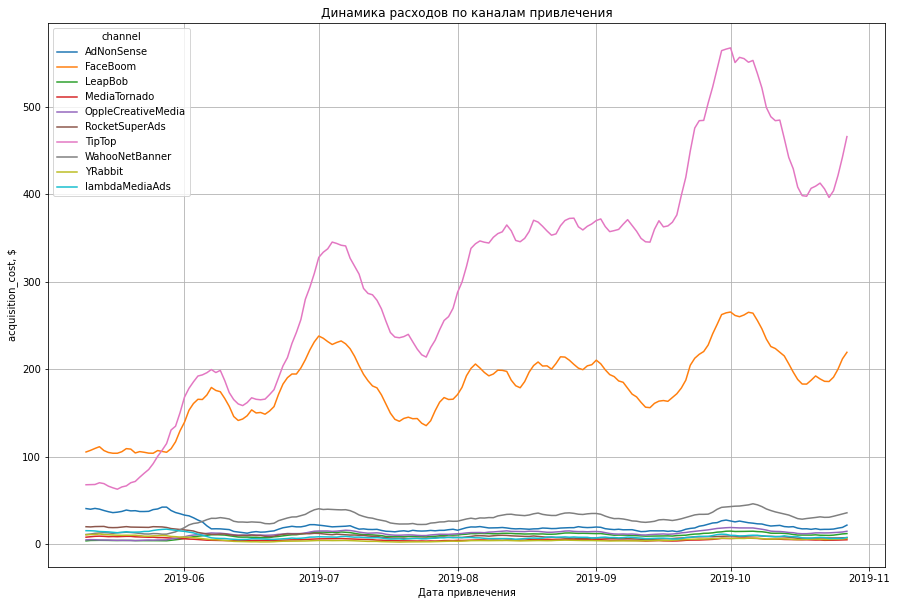

In [42]:
window = 10
costs = costs.pivot_table(
    index='dt', columns='channel', values='costs', aggfunc='sum'
)

filter_data(costs, window).plot(grid=True, figsize=(15, 10))
plt.ylabel('acquisition_cost, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика расходов по каналам привлечения')
plt.show()

Построим график для визуализации изменения метрик по времени

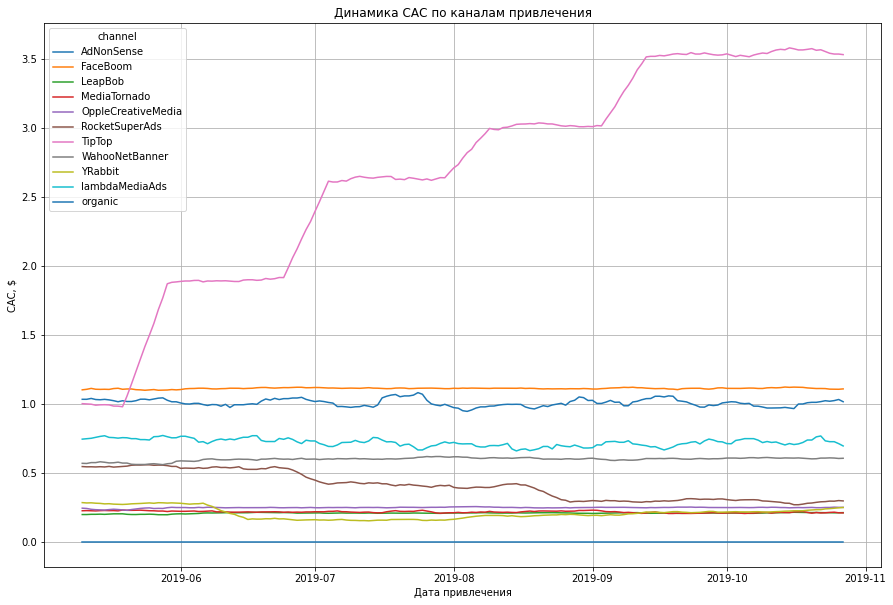

In [43]:
window = 10
profiles_dinamic_CAC = profiles.pivot_table(
    index='dt', columns='channel', values='acquisition_cost', aggfunc='mean'
)

filter_data(profiles_dinamic_CAC, window).plot(grid=True, figsize=(15, 10))
plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения')
plt.show()


Выясним, сколько в среднем стоило привлечение одного пользователя из каждого источника. Рассчитаем средний CAC на одного пользователя для всего проекта и для каждого источника трафика

Перед расчётом среднего отфильтруем пользовательские профили методом `query()`: уберём органических пользователей, так как за их привлечение ничего не платили. Результат сохраним в новой переменной — `filter_profiles`.

In [44]:
filter_profiles = profiles.query('channel != "organic"')

In [45]:
display(filter_profiles['acquisition_cost'].mean())

1.1274813239427588

In [46]:
display(profiles.groupby('channel').agg({'acquisition_cost':'mean'}).sort_values(by= 'acquisition_cost', ascending = False))

,acquisition_cost
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


**Вывод**

Общая сумма расходов на марктетинг у приложения Procrastinate Pro+ составила: 105497.3. Исхогдя из графика, стоимость привлечения одного клиента (САС) у приложения бурнее всего развивается из источника TipTop (также самые большие расходы на рекламу, более 51% от всех расходов на рекламу), заметин динамичный рост у этого источника. Остальные источники идут в разрезе по времени стабильно.В среднем, привлечение одного пользователя дороже всего также у TipTop, за ним идут FaceBoom и AdNonSense, привличение одного пользователя из organic	логично равно 0, так как на привлечение пользователей по данному источнику средства не тратятся

# Шаг 5. Оцените окупаемость рекламы для привлечения пользователей

С помощью LTV и ROI:
- Проанализируйте общую окупаемость рекламы;
- Проанализируйте окупаемость рекламы с разбивкой по устройствам;
- Проанализируйте окупаемость рекламы с разбивкой по странам;
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам.

Опишите проблемы, которые вы обнаружили. Ответьте на вопросы:
- Окупается ли реклама, направленная на привлечение пользователей в целом? 
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
- Чем могут быть вызваны проблемы окупаемости? Изучите конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам.

Опишите возможные причины обнаруженных проблем и сформируйте рекомендации для рекламного отдела. При решении этого шага считайте, что вы смотрите данные 1-го ноября 2019 года и что в вашей организации принято считать, что окупаемость должна наступать не позднее, чем через 2 недели после привлечения пользователей.

### Проанализируйте общую окупаемость рекламы

Проанализируем общую окупаемость рекламы, для этого построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
Для этого зададим горизонт анализа (по условию 14 дней), момент анализа задан ранее

Сначала проанализируем общую окупаемость рекламы

In [47]:
observation_date = datetime(2019, 11, 1).date()

In [48]:
analysis_horizon = 14

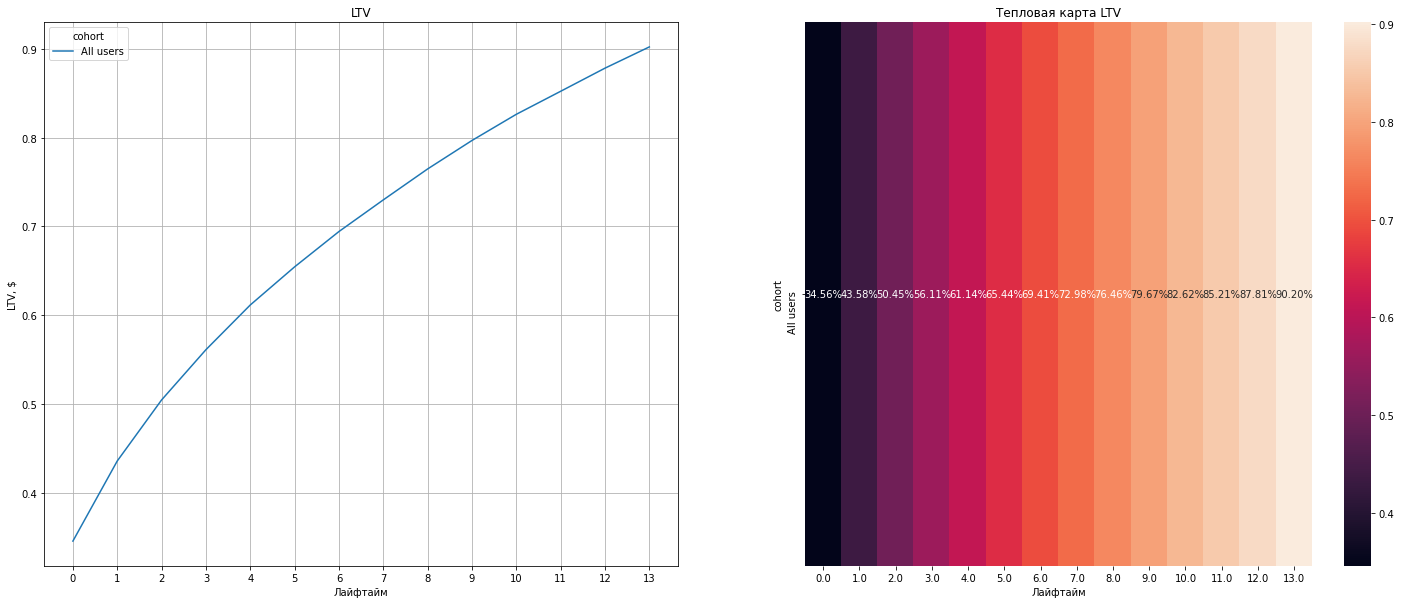

In [49]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    filter_profiles, orders, observation_date, analysis_horizon, dimensions=[]
)
# исключаем размеры когорт
report = ltv.drop(columns = ['cohort_size'])
report.T.plot(grid=True, figsize=(25, 10), xticks=list(report.columns.values), ax=plt.subplot(1, 2, 1))
# в одной ячейке таблицы графиков постройте кривые LTV
plt.title('LTV')
plt.ylabel('LTV, $')
plt.xlabel('Лайфтайм')

# в другой — хитмэп
sns.heatmap(ltv.drop(columns=['cohort_size']), annot=True, fmt='.2%', ax=plt.subplot(1, 2, 2))
plt.title('Тепловая карта LTV')
plt.xlabel('Лайфтайм')

plt.show()

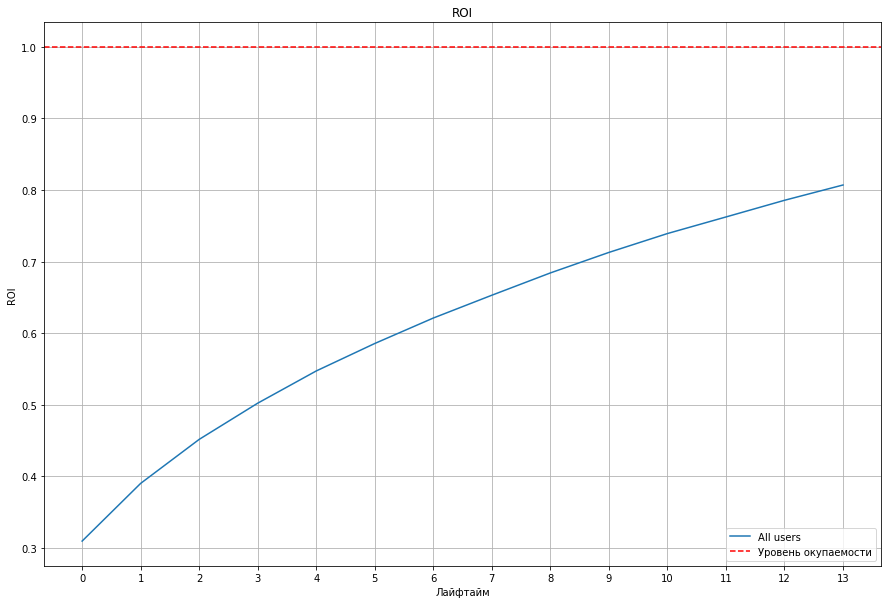

In [50]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    filter_profiles, orders, observation_date, analysis_horizon, dimensions=[]
) # получите сырые данные, таблицы LTV и ROI, а также таблицы динамики LTV и ROI

report = roi.drop(columns=['cohort_size', 'cac']) # исключите размеры когорт и CAC из таблицы ROI

# строим кривые ROI
report.T.plot(grid=True, figsize=(15, 10), xticks=list(report.columns.values))
plt.title('ROI')
plt.ylabel('ROI')
plt.xlabel('Лайфтайм')
plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
plt.legend()
plt.show()

In [51]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

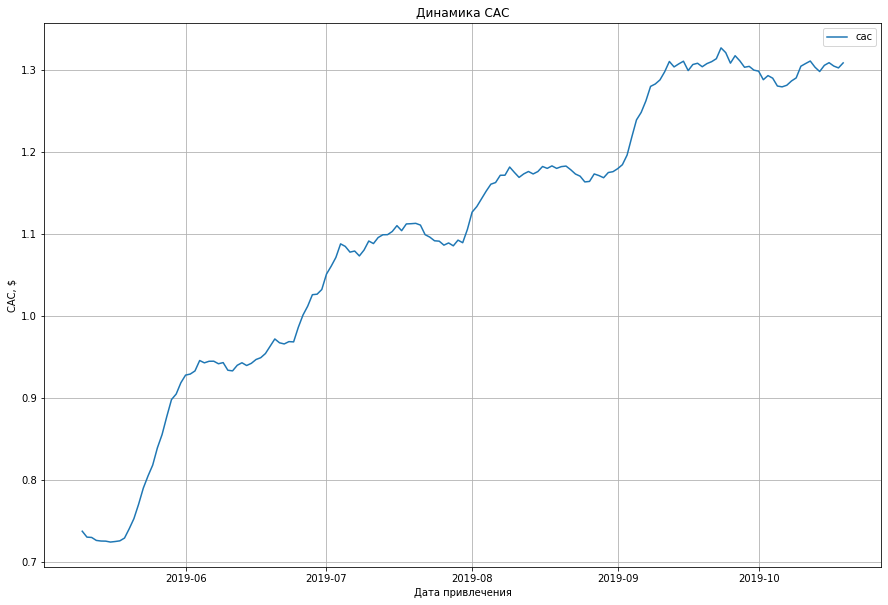

In [52]:
window = 10
roi_history = roi_history.pivot_table(
    index='dt', values='cac', aggfunc='mean'
)

filter_data(roi_history, window).plot(grid=True, figsize=(15, 10))
plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС')
plt.show()

По графикам можно сделать такие выводы:
- Реклама не окупается. ROI даже спустя две недели ниже уровня окупаемости.
- CAC ростёт. Значит, рекламный бюджет увеличивается.
- Кривая LTV постоянно растёт ожидаемым образом. Значит, мы верно определили момент и горизонт анализа данных. Двух недельный LTV   пользователей составил 90 %. LTV достаточно стабилен.

Чтобы разобраться в причинах, пройдём по всем доступным характеристикам пользователей — стране, источнику и устройству посещения

### Проанализируйте окупаемость рекламы с разбивкой по странам

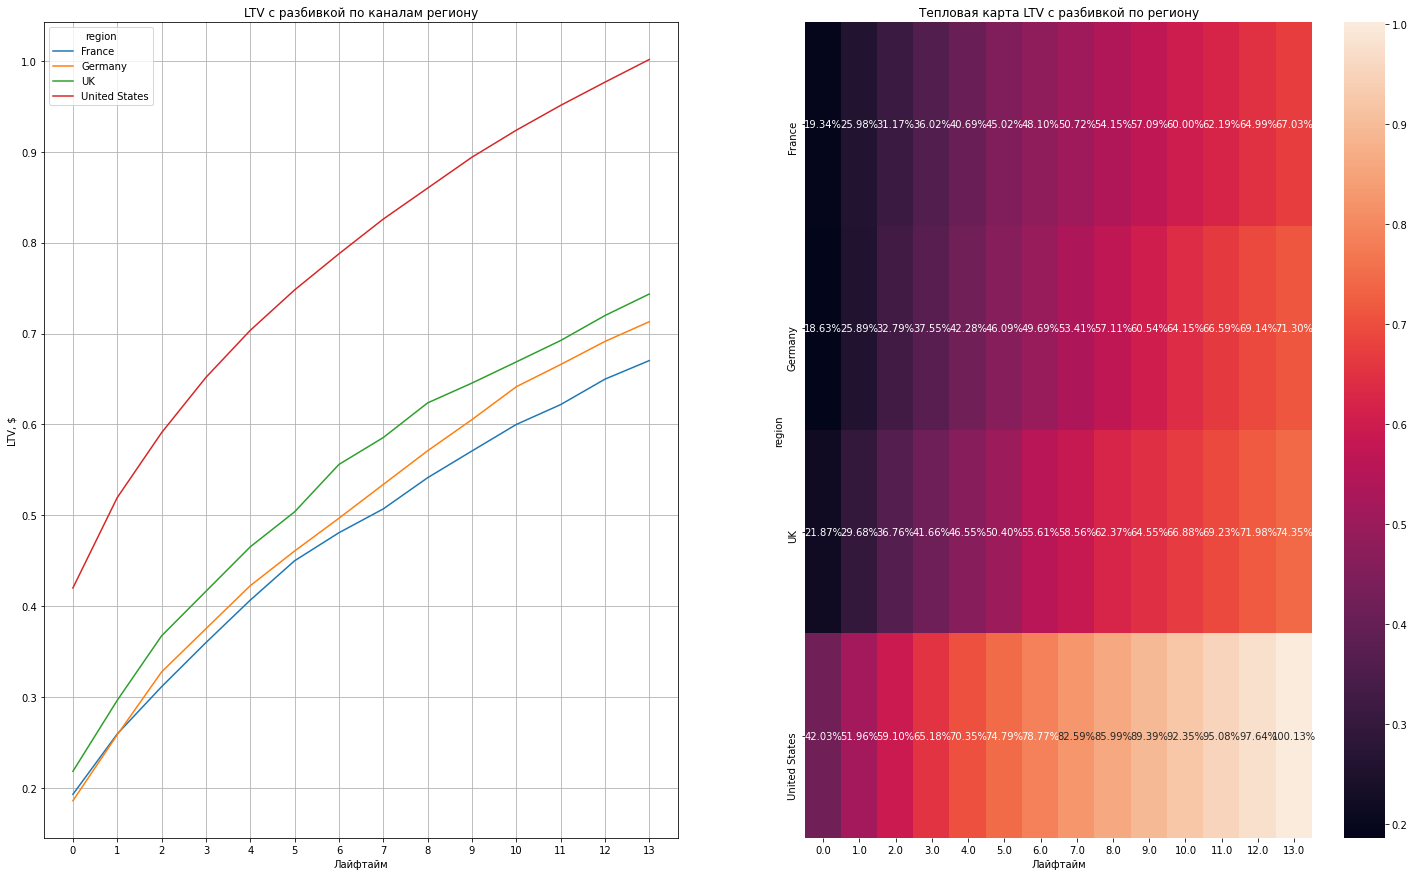

In [53]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    filter_profiles, orders, observation_date, analysis_horizon, dimensions=['region']
) # получите сырые данные, таблицы LTV и ROI, а также таблицы динамики LTV и ROI
# исключаем размеры когорт
report = ltv.drop(columns = ['cohort_size'])
report.T.plot(grid=True, figsize=(25, 15), xticks=list(report.columns.values), ax=plt.subplot(1, 2, 1))
# в одной ячейке таблицы графиков постройте кривые LTV
plt.title('LTV с разбивкой по каналам региону')
plt.ylabel('LTV, $')
plt.xlabel('Лайфтайм')

# в другой — хитмэп
sns.heatmap(ltv.drop(columns=['cohort_size']), annot=True, fmt='.2%', ax=plt.subplot(1, 2, 2))
plt.title('Тепловая карта LTV с разбивкой по региону')
plt.xlabel('Лайфтайм')

plt.show()

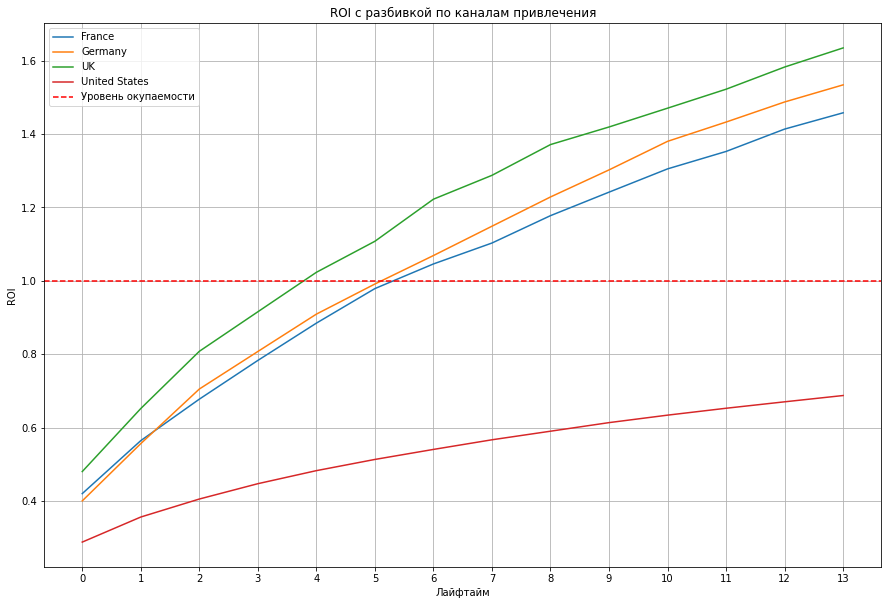

In [54]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    filter_profiles, orders, observation_date, analysis_horizon, dimensions=['region']
) # получите сырые данные, таблицы LTV и ROI, а также таблицы динамики LTV и ROI

report = roi.drop(columns=['cohort_size', 'cac']) # исключите размеры когорт и CAC из таблицы ROI

# строим кривые ROI
report.T.plot(grid=True, figsize=(15, 10), xticks=list(report.columns.values))
plt.title('ROI с разбивкой по каналам привлечения')
plt.ylabel('ROI')
plt.xlabel('Лайфтайм')
plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
plt.legend()
plt.show()

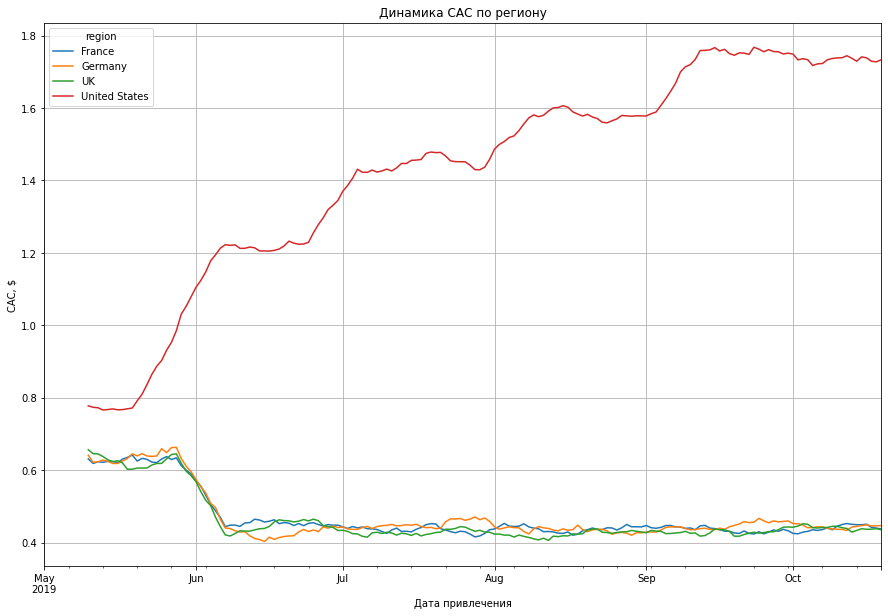

In [55]:
window = 10
roi_history = roi_history.pivot_table(
    index='dt', columns='region', values='cac', aggfunc='mean'
)

filter_data(roi_history, window).plot(grid=True, figsize=(15, 10))
plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по региону')
plt.show()

По графикам можно сделать такие выводы:
- Реклама в Великобритании окупается на 4 день, в Германии и Франции тоже, немного позже. А вот в США ROI даже спустя две недели ниже уровня окупаемости.
- Рекламный бюджет в США бурно растёт, в остальных странах он достаточно стабилен.
- Кривые LTV постоянно растут ожидаемым образом. Самый высокий двух недельный LTV В США, далее идут Великобритания, Германия и на последнем месте Франуция

### Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам

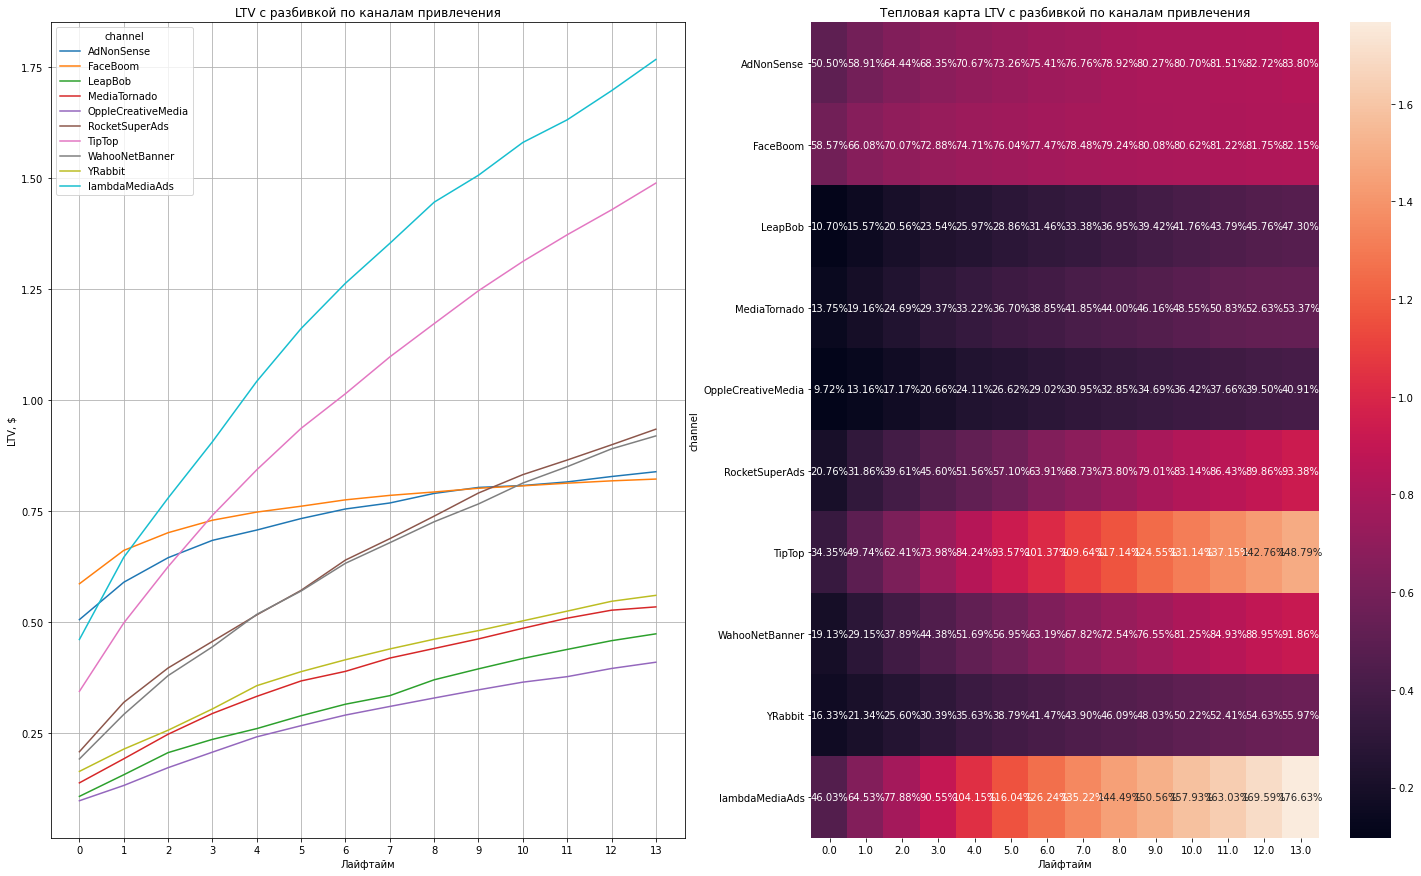

In [56]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    filter_profiles, orders, observation_date, analysis_horizon, dimensions=['channel']
) # получите сырые данные, таблицы LTV и ROI, а также таблицы динамики LTV и ROI
# исключаем размеры когорт
report = ltv.drop(columns = ['cohort_size'])
report.T.plot(grid=True, figsize=(25, 15), xticks=list(report.columns.values), ax=plt.subplot(1, 2, 1))
# в одной ячейке таблицы графиков постройте кривые LTV
plt.title('LTV с разбивкой по каналам привлечения')
plt.ylabel('LTV, $')
plt.xlabel('Лайфтайм')

# в другой — хитмэп
sns.heatmap(ltv.drop(columns=['cohort_size']), annot=True, fmt='.2%', ax=plt.subplot(1, 2, 2))
plt.title('Тепловая карта LTV с разбивкой по каналам привлечения')
plt.xlabel('Лайфтайм')

plt.show()

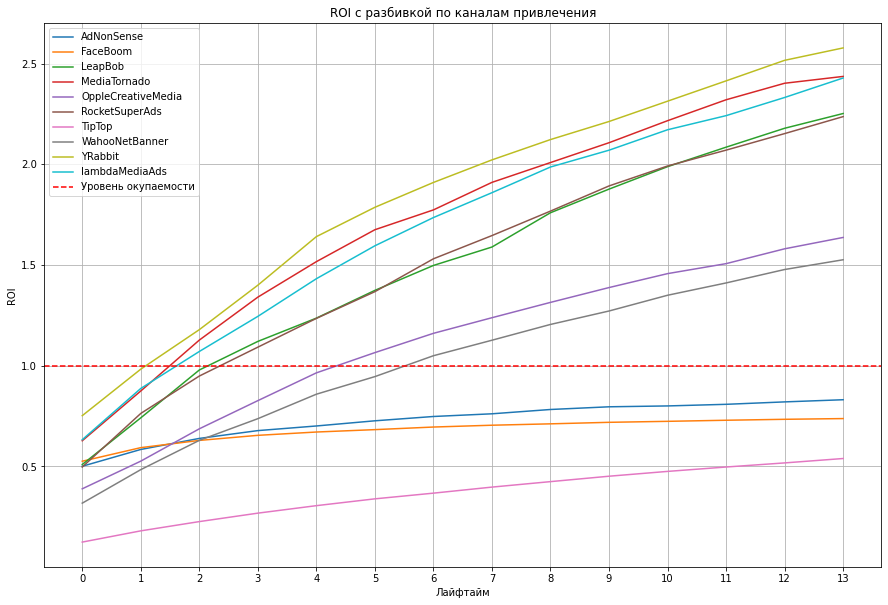

In [57]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    filter_profiles, orders, observation_date, analysis_horizon, dimensions=['channel']
) # получите сырые данные, таблицы LTV и ROI, а также таблицы динамики LTV и ROI

report = roi.drop(columns=['cohort_size', 'cac']) # исключите размеры когорт и CAC из таблицы ROI

# строим кривые ROI
report.T.plot(grid=True, figsize=(15, 10), xticks=list(report.columns.values))
plt.title('ROI с разбивкой по каналам привлечения')
plt.ylabel('ROI')
plt.xlabel('Лайфтайм')
plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
plt.legend()
plt.show()

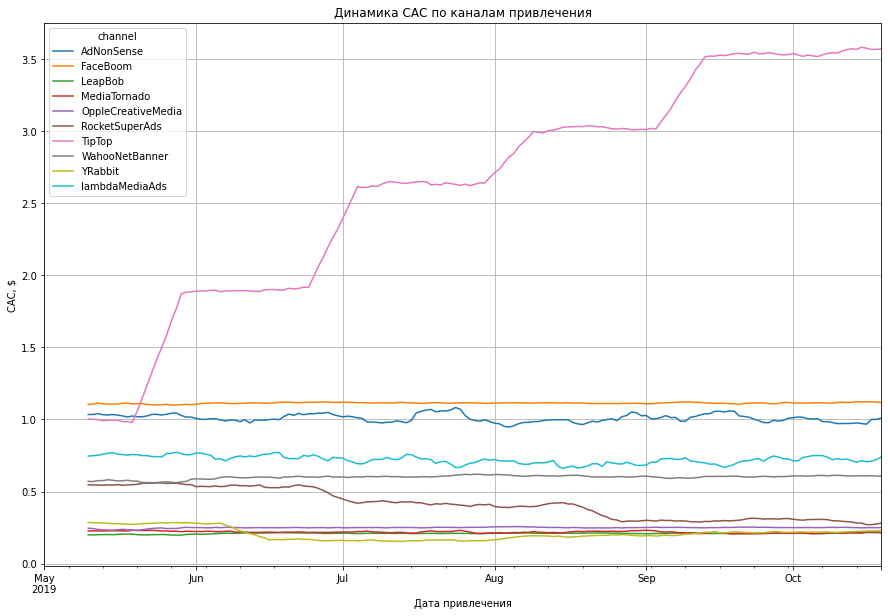

In [58]:
window = 10
roi_history = roi_history.pivot_table(
    index='dt', columns='channel', values='cac', aggfunc='mean'
)

filter_data(roi_history, window).plot(grid=True, figsize=(15, 10))
plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения')
plt.show()


По графикам можно сделать такие выводы:
- Реклама бытрее всего окупается в YRabbit, в большенстве источников реклама также окупается. А вот в TipTop, FaceBoom и AdNonSense ROI даже спустя две недели ниже уровня окупаемости.
- Рекламный бюджет в TipTop бурно растёт, в остальных источниках он достаточно стабилен
- Кривая LTV постоянно растёт ожидаемым образом. Самая большая LTV у LambdaMediaAds и TipTop. Также стоит отметь что у FaceBoom и AdNonSense довольно пологий рост LTV

**Вывод**

Обнаружилась явная проблема, что у страны с самым большим LTV США, ROI не окупается, при том что затраты на рекламу в США бурно растут и имеют явный отрыв от остальных. Также стоит отметить, что в таких крупных (по LTV) каналах привлечения как TipTop, FaceBoom и AdNonSense реклама не окупается, особено тревожит TipTop у которого затраты на рекламу самые большие и бурно растут, а окупаемость самая низкая и почти в 2 раза ниже уровня окупаемости

### Изучиv конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам

Узнаем, в чём причина: в низкой конверсии или низком удержании

In [59]:
# смотрим удержание с разбивкой по устройствам
retention_raw, retention_grouped, retention_history = get_retention(
    filter_profiles, visits, observation_date, analysis_horizon)

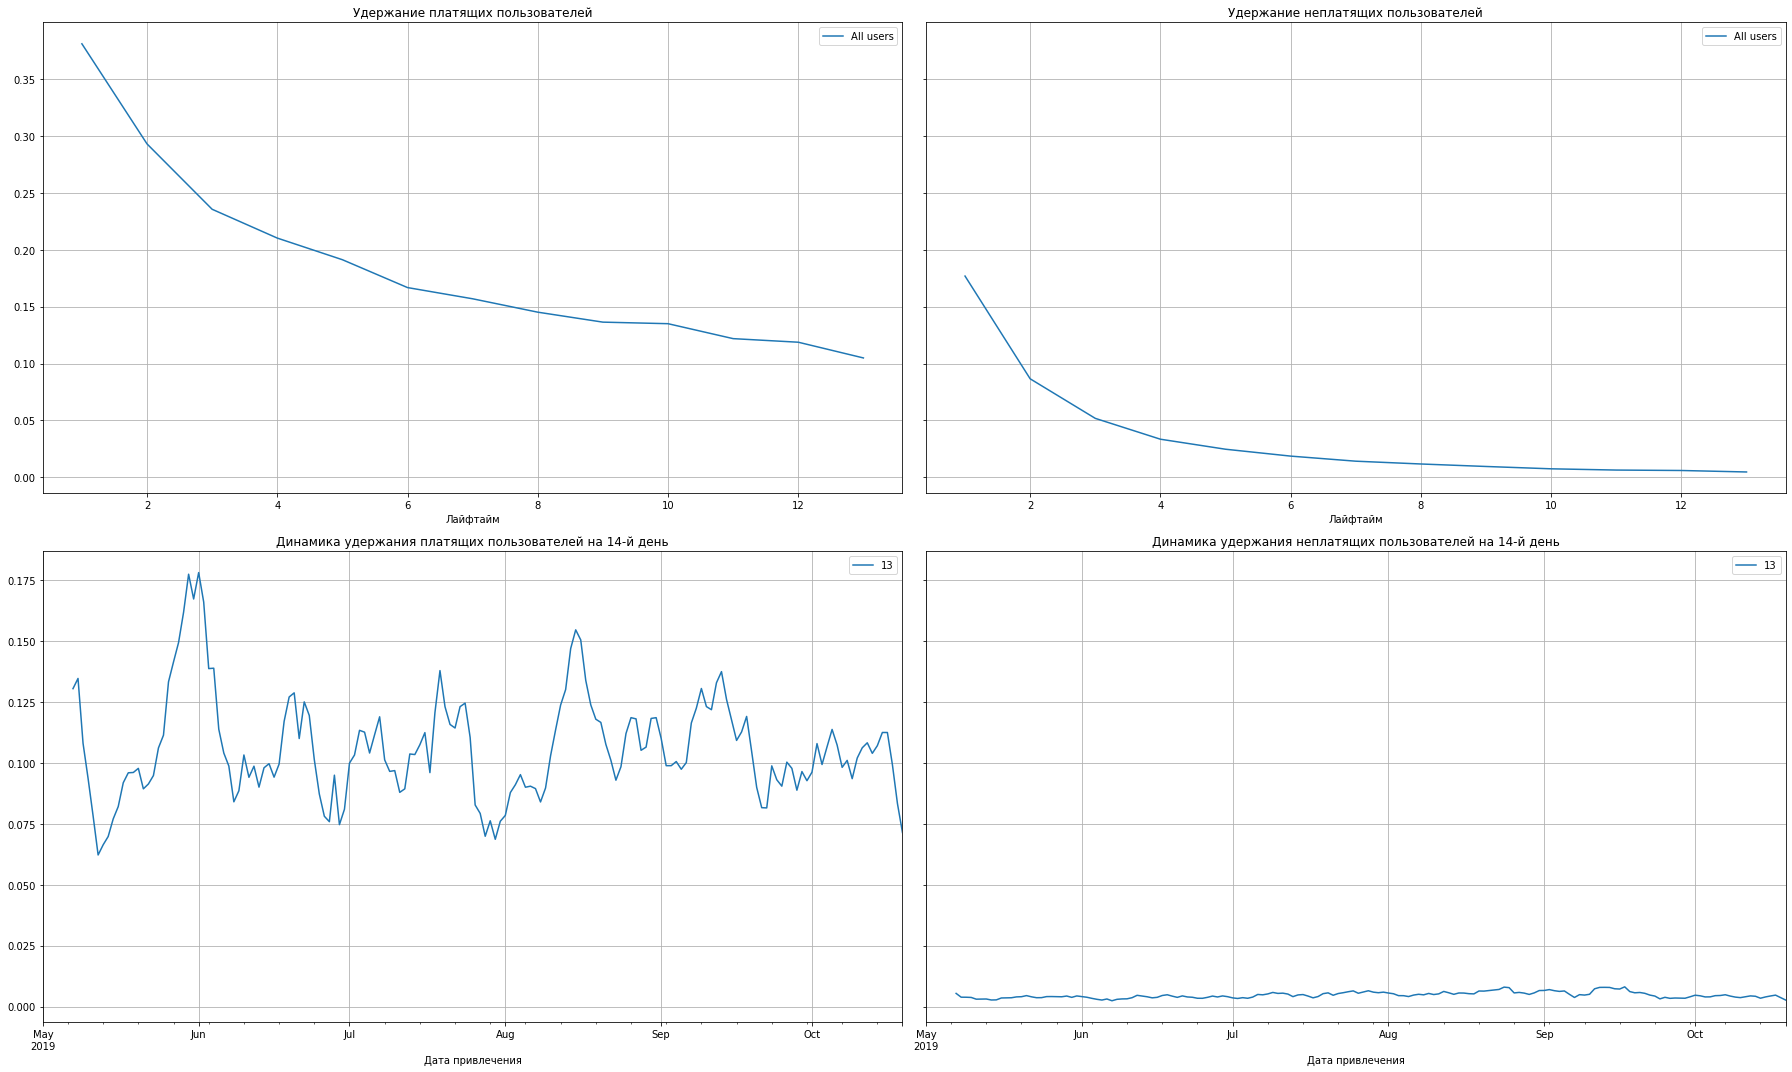

In [60]:
plot_retention(retention_grouped, retention_history, analysis_horizon) 

Форма распределений удержания близка к обратно-экспоненциальной, кривая платящих пользователей находится выше, чем кривая неплатящих, значит расчитано верно. Удержание неплатящих пользователей на 14- ый день почти равно 0  

In [61]:
# смотрим удержание с разбивкой по регеону
dimensions = ['region']
retention_raw, retention_grouped, retention_history = get_retention(
    filter_profiles, visits, observation_date, analysis_horizon, dimensions=dimensions)


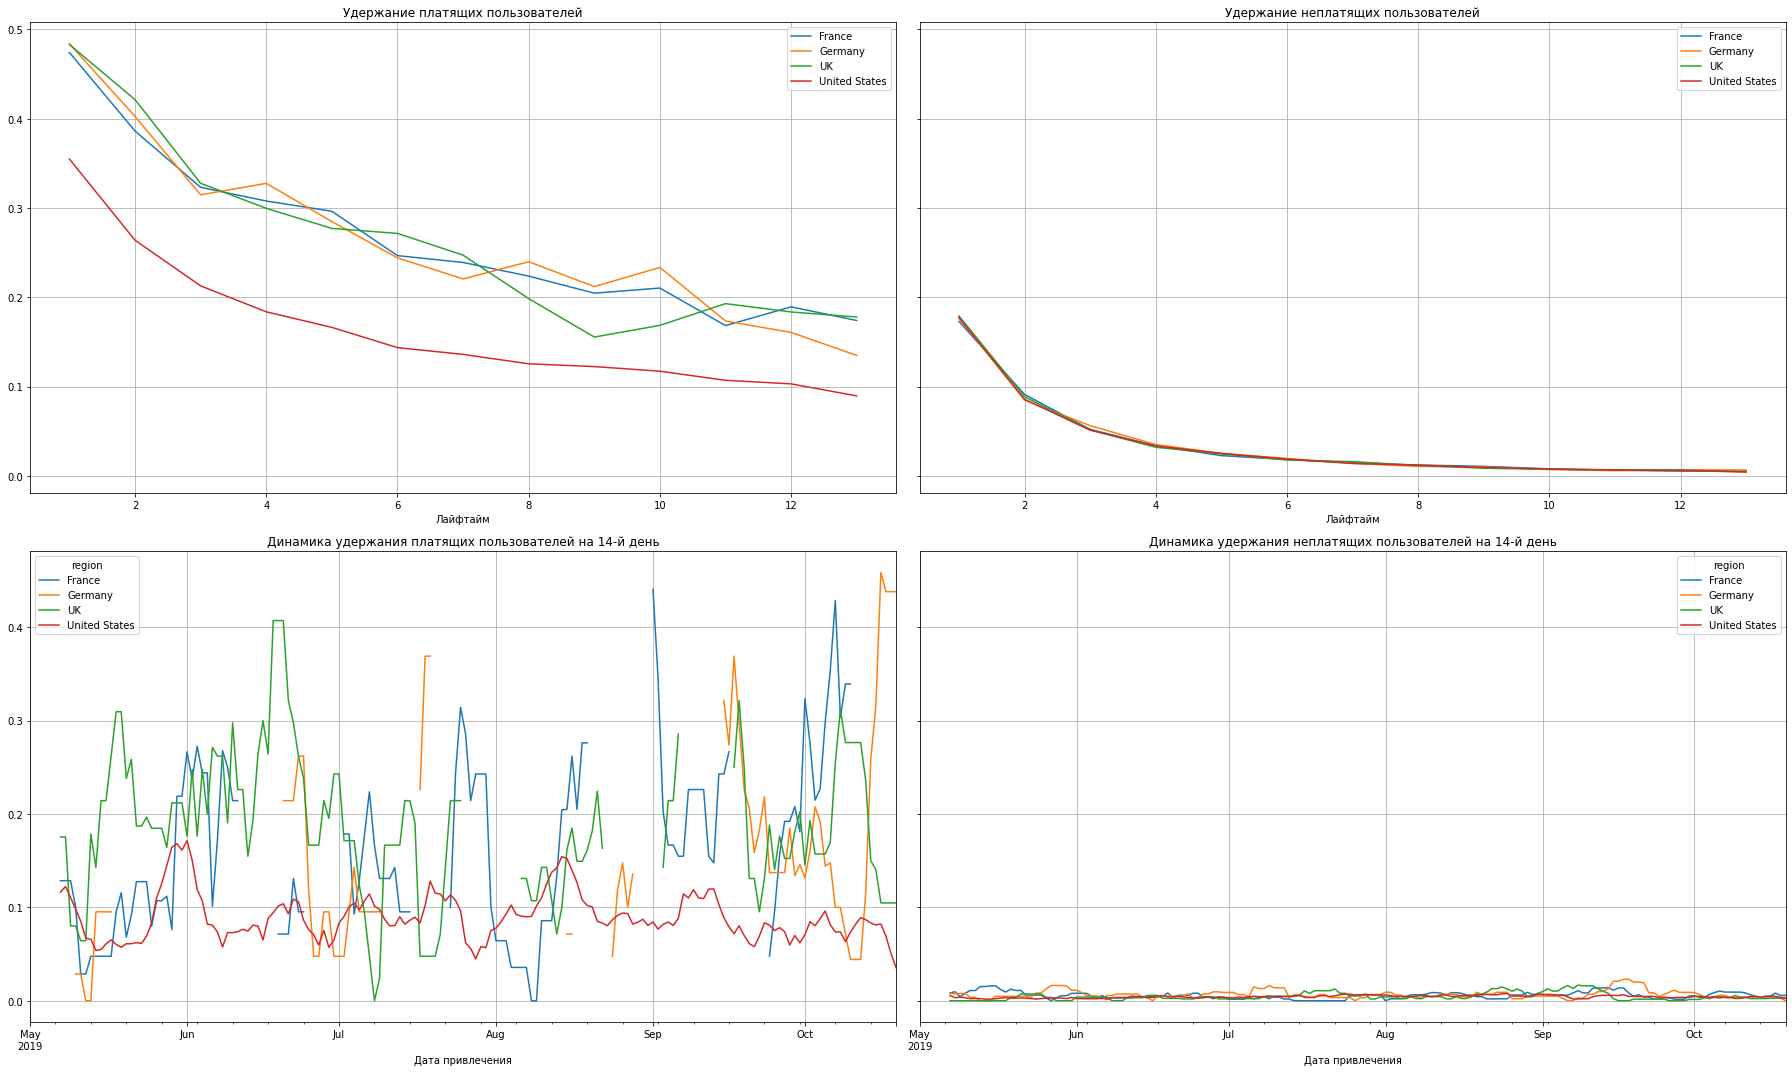

In [62]:
plot_retention(retention_grouped, retention_history, analysis_horizon) 

Платящие пользователи из США стабильно ниже всех удерживаются. Это очень низкий показатель. У неплатящие пользователей удержание 14-го дня примерно одинаково у всех.

In [63]:
# смотрим удержание с разбивкой по устройствам
dimensions = ['device']
retention_raw, retention_grouped, retention_history = get_retention(
    filter_profiles, visits, observation_date, analysis_horizon, dimensions=dimensions)

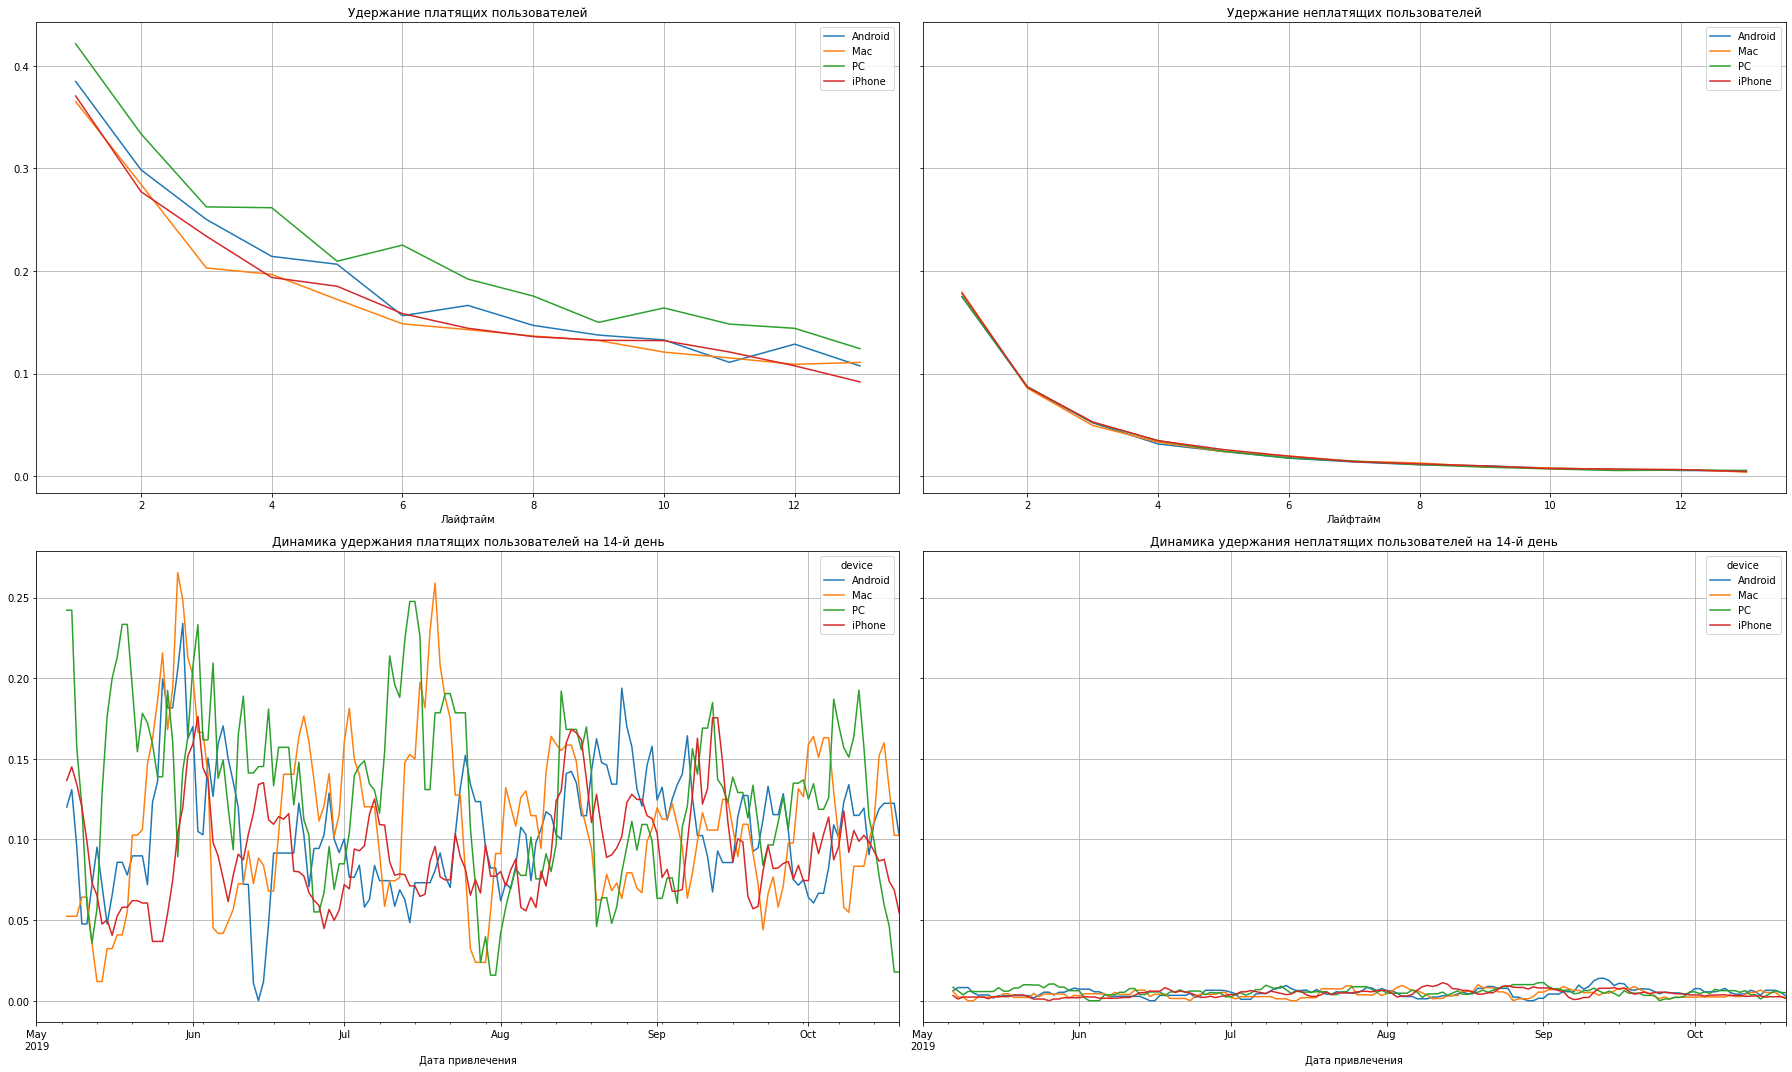

In [64]:
plot_retention(retention_grouped, retention_history, analysis_horizon) 

Лучше всего удерживаются пользователи PC, затем идут пользователи Android, далее пользователи iPhone и Mac. Видимо у приложения какие-то проблемы с устройствами Apple. Удержание неплатящих пользователей стабильно плохое у всех устройств

In [65]:
# смотрим удержание с разбивкой по каналам
dimensions = ['channel']
retention_raw, retention_grouped, retention_history = get_retention(
    filter_profiles, visits, observation_date, analysis_horizon, dimensions=dimensions)

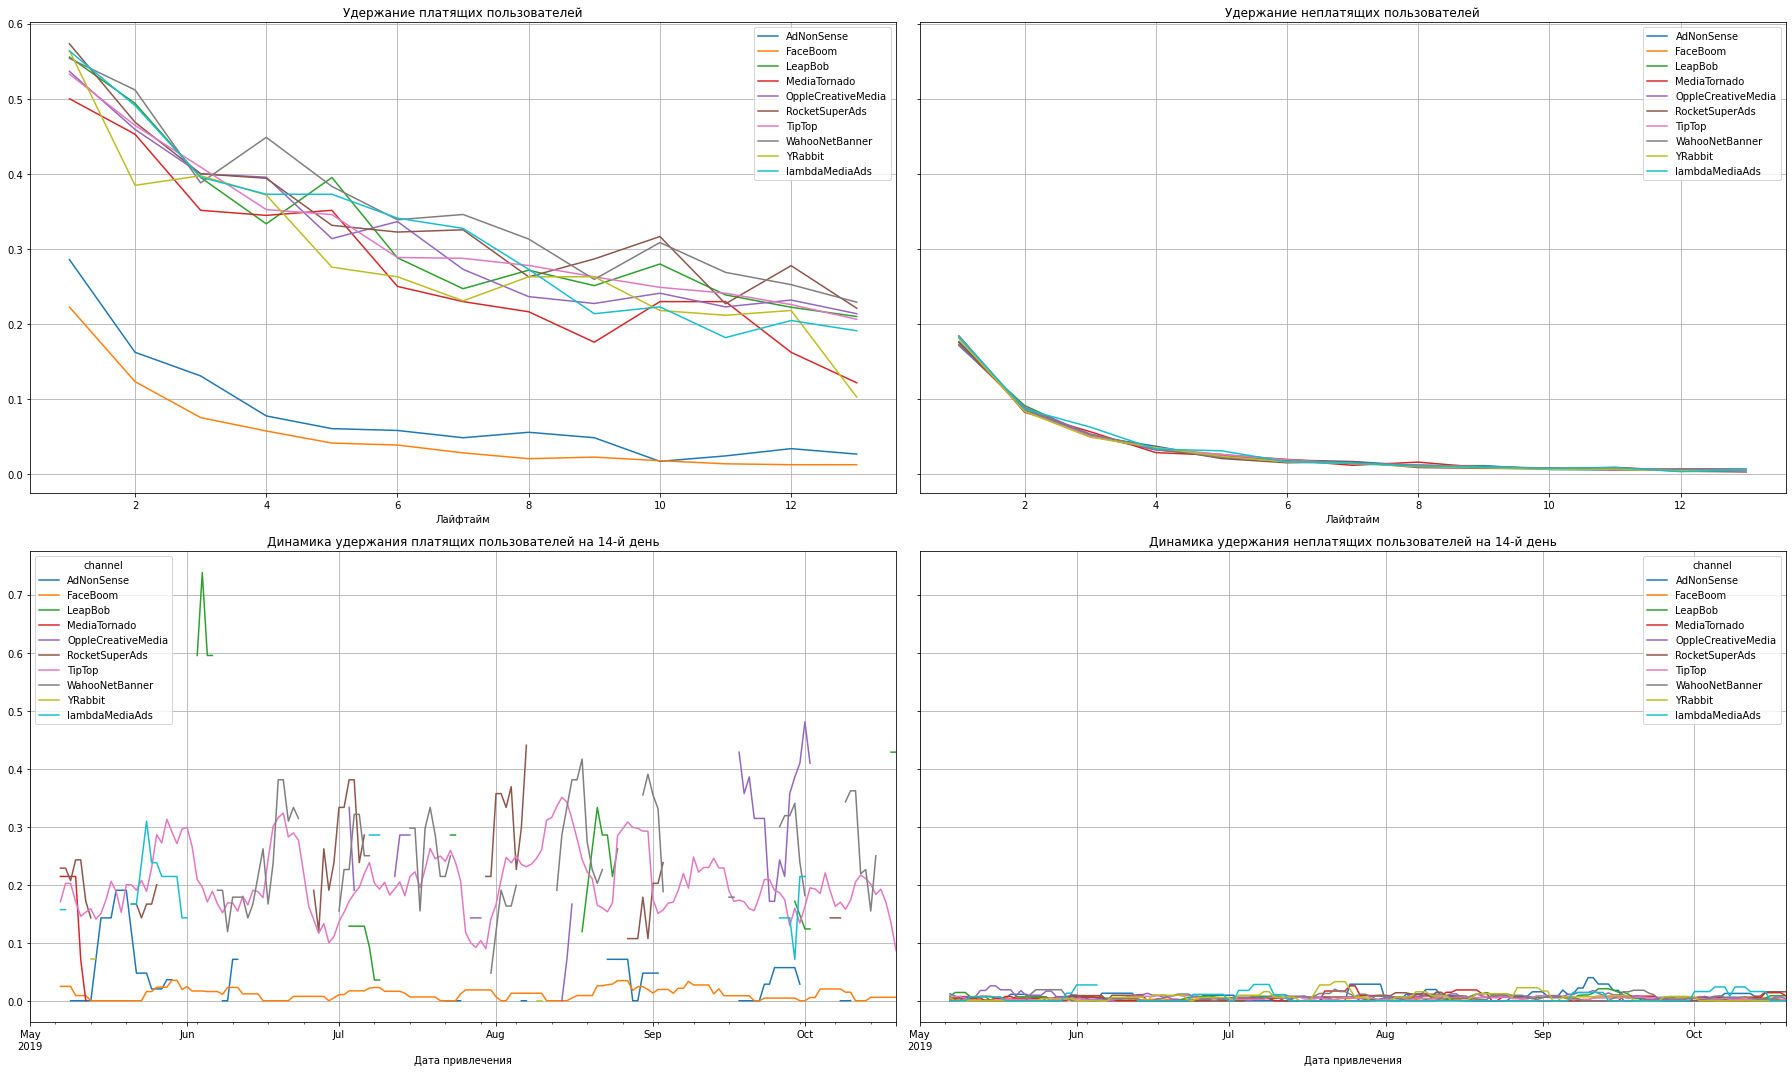

In [66]:
plot_retention(retention_grouped, retention_history, analysis_horizon)

Самое плохое удержание у пользователей из источника FaceBoom, далее следует AdNonSense, они отстают от остальных кналов привлечения

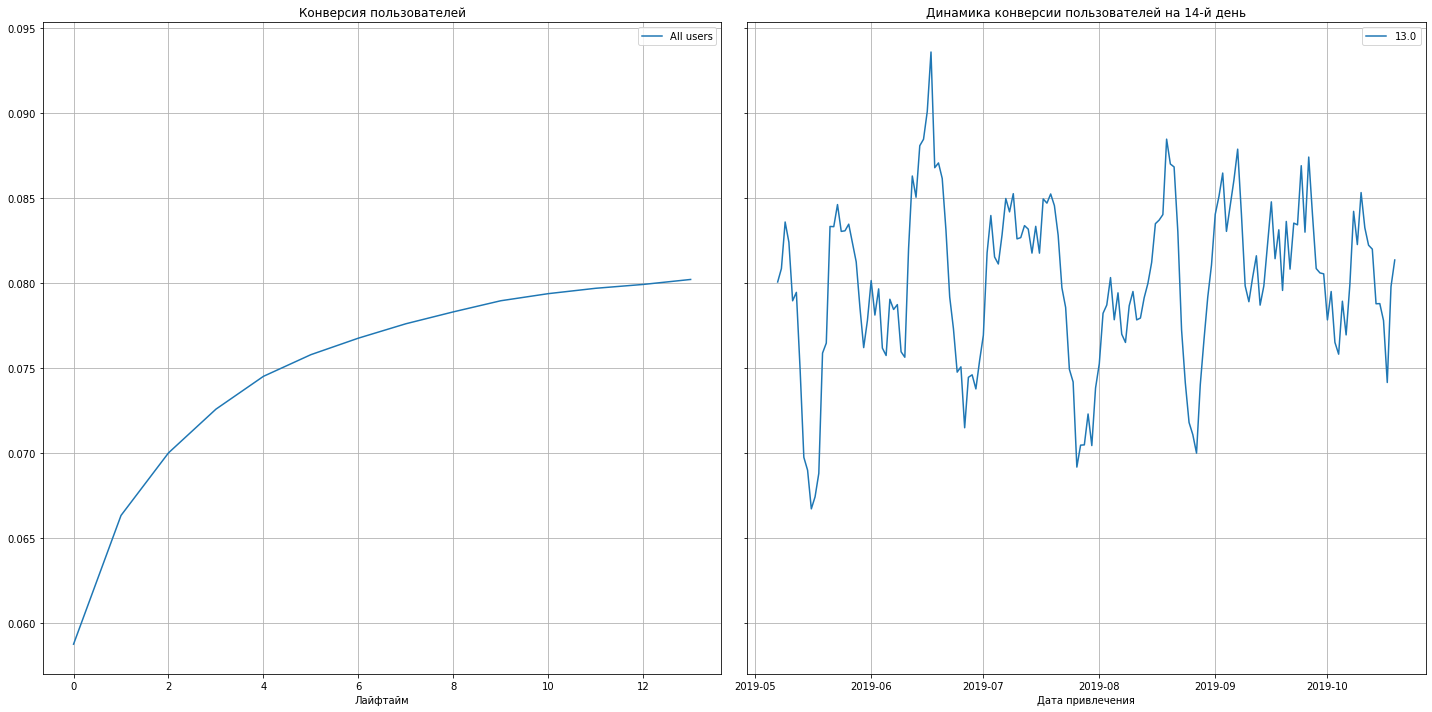

In [67]:
# смотрим конверсию
dimensions = []
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    filter_profiles, orders, observation_date, analysis_horizon, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, analysis_horizon) 

Конверсия растёт по экспоненциальному закону и не превыщает 1, значит расчитана правильно. Кроме того, конверсия не падает — значит, при расчёте были верно определены момент и горизонт анализа данных

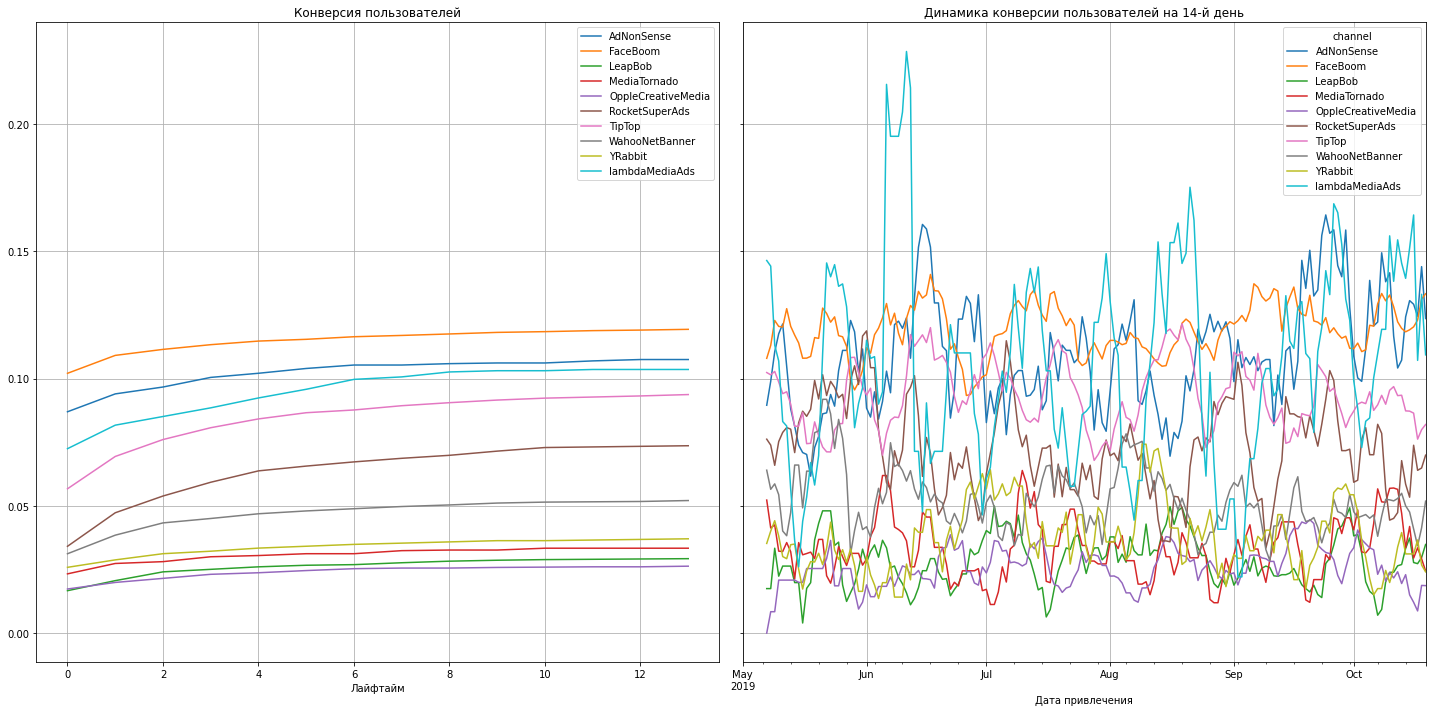

In [68]:
# смотрим конверсию с разбивкой по каналам
dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    filter_profiles, orders, observation_date, analysis_horizon, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, analysis_horizon)

Судя по графикам, пользователи из всех каналов конвертируются стабильно, но не очень хорошо. Лучше всех конвертируются пользователи из канала FaceBoom, хуже всего пользователи из OppleCreativeMedia

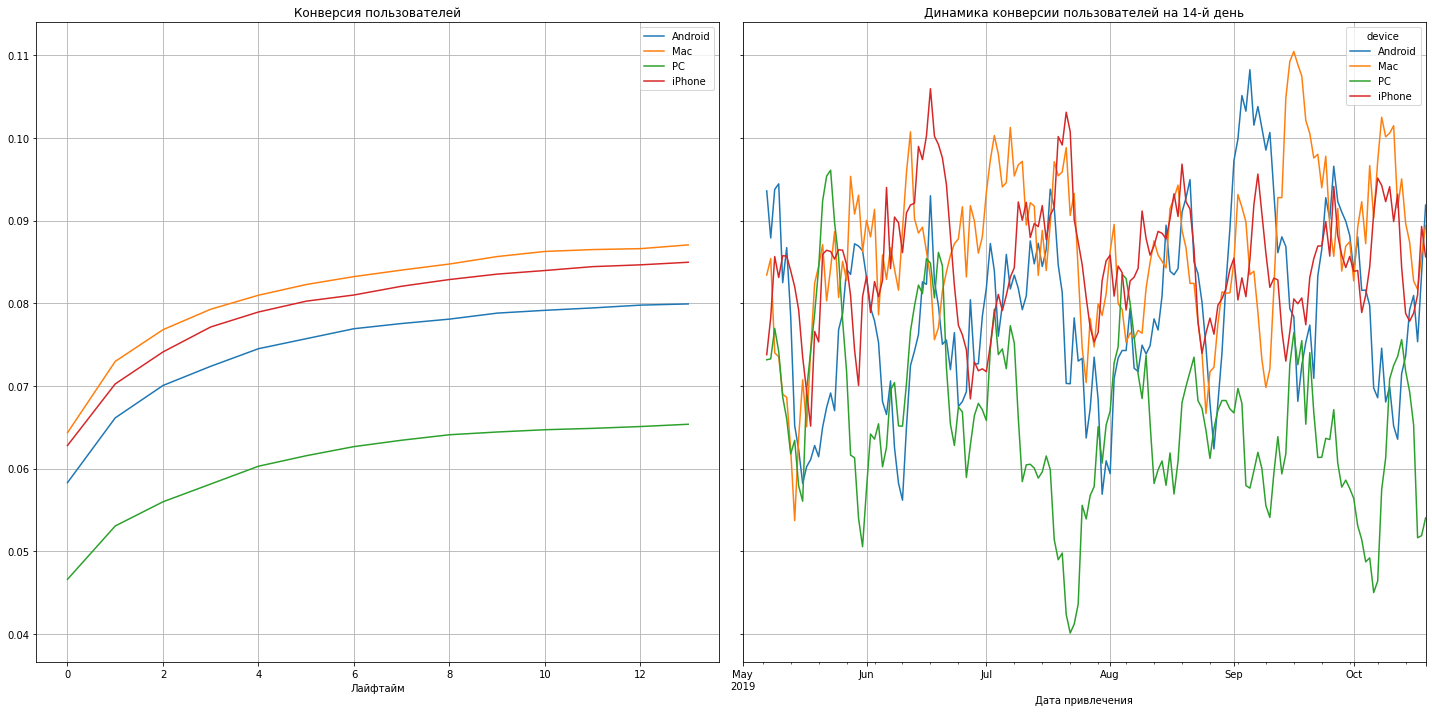

In [69]:
# смотрим конверсию с разбивкой по устройствам
dimensions = ['device']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    filter_profiles, orders, observation_date, analysis_horizon, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, analysis_horizon)

А вот с конверсией у устройств Apple все в порядке, они лидируют по этому показателю, самая плохая конверсия у пользователей PC

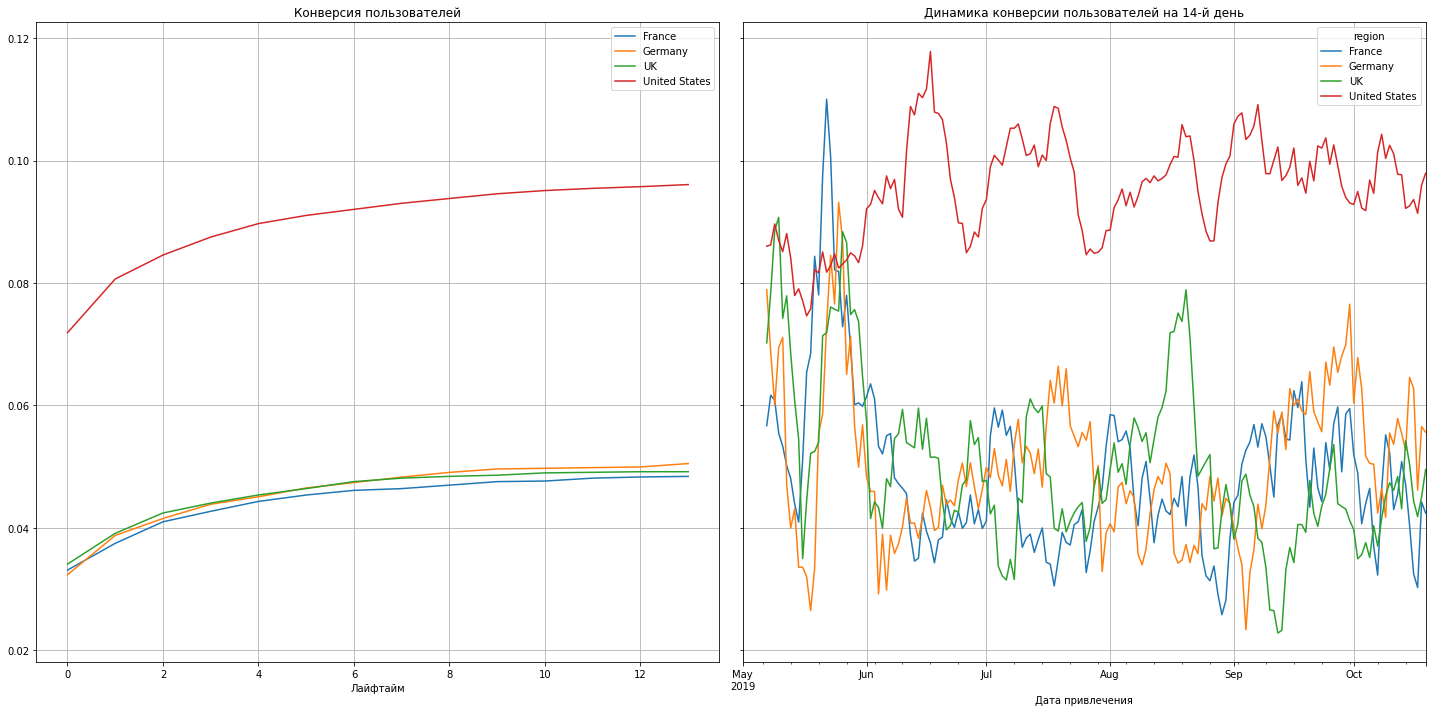

In [70]:
# смотрим конверсию с разбивкой по регеону
dimensions = ['region']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    filter_profiles, orders, observation_date, analysis_horizon, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, analysis_horizon)

По конверсии лидируют пользователи из США, на последнем месте пользователи из Франции

**Вывод**

Очень заметно, что у пользователей из США и пользователей Apple, лучшая конвресия, но худшее удержание, возможно, проблема кроется в технических моментах работы приложения и неэффективности рекламы в США

# Шаг 6. Напишите выводы
- Выделите причины неэффективности привлечения пользователей;
- Сформируйте рекомендации для отдела маркетинга для повышения эффективности.

Явная причина неэффективности видятся в рекламной деятельности в США, так как в рекламу там вкладывается самое большре количество денег, при чем эти затраты постоянно растут, но реклама не окупается, при том окупаемость в США самая низкая. Стоит повысить эффективность рекламной компании в США, один из вариантов деверсификаия расходов по разным каналам привлечения, в частности снизить вложения на маркетинг в  TipTop, так как в нём самая неэффективная реклама. 
Вместе с тем, стоит обратить внимание на пользователей устройств Apple (которых в США тоже много), у них лучшая конверсия (как и у пользователей из США), но плохое удержание (как и пользователей из США), возможно, проблема с интерфейсом или подобная техническая проблема у приложения при взаимодействии с устройствами Apple, стоит плотно поработать с разработчиками, что бы устранить проблему.